In [1]:
# import libraries, other imports are as we go through encoding
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
accident = pd.read_csv('dataset/accident_data.csv')
accident.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


## Data Cleaning

In [3]:
accident.shape

(660679, 14)

In [4]:
# get all the datatypes
# date is a str
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [5]:
# number of unique values in each column
for col in accident.columns:
  print(f'{col}: {accident[col].nunique()}')

Index: 421020
Accident_Severity: 3
Accident Date: 1461
Latitude: 511618
Light_Conditions: 5
District Area: 422
Longitude: 529766
Number_of_Casualties: 36
Number_of_Vehicles: 19
Road_Surface_Conditions: 5
Road_Type: 5
Urban_or_Rural_Area: 3
Weather_Conditions: 8
Vehicle_Type: 16


In [6]:
# make a copy of accident dataframe
accident_copy = accident.copy()

In [7]:
# get general idea of min max for the numerical columns (no anomalies)
accident_copy.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [8]:
accident_copy['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [9]:
accident_copy['Accident_Severity'].value_counts() / accident_copy['Accident_Severity'].shape[0]

Accident_Severity
Slight     0.853366
Serious    0.133525
Fatal      0.013109
Name: count, dtype: float64

Accident Date

In [10]:
# turn dates column into three columns: day, month, year
accident_copy['Day'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[0]))
accident_copy['Month'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[1]))
accident_copy['Year'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[2]))

accident_copy['Accident_Date'] = pd.to_datetime(accident['Accident Date'], format="%d-%m-%Y")
accident_copy = accident_copy.drop(columns=['Accident Date'])

Latitude and Longitude

In [11]:
# Drop Longitude/ Latitude
accident_copy = accident_copy.dropna(subset=['Latitude'])
accident_copy = accident_copy.dropna(subset=['Longitude'])

Light_Conditions

In [12]:
# assume NaN for 'Darkness - lighting unknown'
accident_copy['Light_Conditions'] = accident['Light_Conditions'].replace('Darkness - lighting unknown', np.NaN)

District Area

In [13]:
# rename District Area so it is consistent in column formatting
accident_copy = accident_copy.rename(columns={'District Area': 'District_Area'})


Weather_Conditions

In [14]:
# weather conditions seem to have combinations, so we could one hot encode it instead
# the categories include 'Fine', 'High Winds', 'Raining', 'Snowing', 'Fog or mist', 'Other'

# first split up the labels into lists
accident_copy['Weather_Conditions_List'] = accident['Weather_Conditions'].apply(
    lambda x: ['Fine'] if x == 'Fine no high winds'
    else ['Raining'] if x == 'Raining no high winds'
    else ['Fine', 'High winds'] if x == 'Fine + high winds'
    else ['Raining', 'High winds'] if x == 'Raining + high winds'
    else ['Snowing'] if x == 'Snowing no high winds'
    else ['Fog or mist'] if x == 'Fog or mist'
    else ['Snowing', 'High winds'] if x == 'Snowing + high winds'
    else ['Other'] if x == 'Other'
    else np.NaN
)

Vehicle_Type

In [15]:
# assume NaN for 'Data missing or out of range'
accident_copy['Vehicle_Type'] = accident['Vehicle_Type'].replace('Data missing or out of range', np.NaN)

Urban_or_Rural_Area

In [16]:
# assume NaN for 'Data missing or out of range'
accident_copy['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].replace('Unallocated', np.NaN)

In [17]:
# find out the current number of missing values in the dataset
accident_copy.isnull().sum()

Index                          0
Accident_Severity              0
Latitude                       0
Light_Conditions            6484
District_Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4518
Urban_or_Rural_Area            5
Weather_Conditions         14127
Vehicle_Type                   6
Day                            0
Month                          0
Year                           0
Accident_Date                  0
Weather_Conditions_List    14127
dtype: int64

In [18]:
# drop all NaN values 
# try another vers. where we impute --> see difference in performance
accident_copy = accident_copy.dropna()
print(f'Before dropping missing values: {accident.shape[0]} rows')
print(f'After dropping missing values: {accident_copy.shape[0]} rows')

Before dropping missing values: 660679 rows
After dropping missing values: 638022 rows


In [19]:
# cleaned, but before encoding
accident_copy.head()

,Index,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year,Accident_Date,Weather_Conditions_List
0,200701BS64157,Serious,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,5,6,2019,2019-06-05,[Fine]
1,200701BS65737,Serious,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2,7,2019,2019-07-02,[Raining]
3,200701BS66128,Serious,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),16,8,2019,2019-08-16,[Fine]
5,200701BS67159,Serious,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,18,9,2019,2019-09-18,[Fine]
6,200701BS67207,Serious,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,5,9,2019,2019-09-05,[Fine]


## Exploring Data

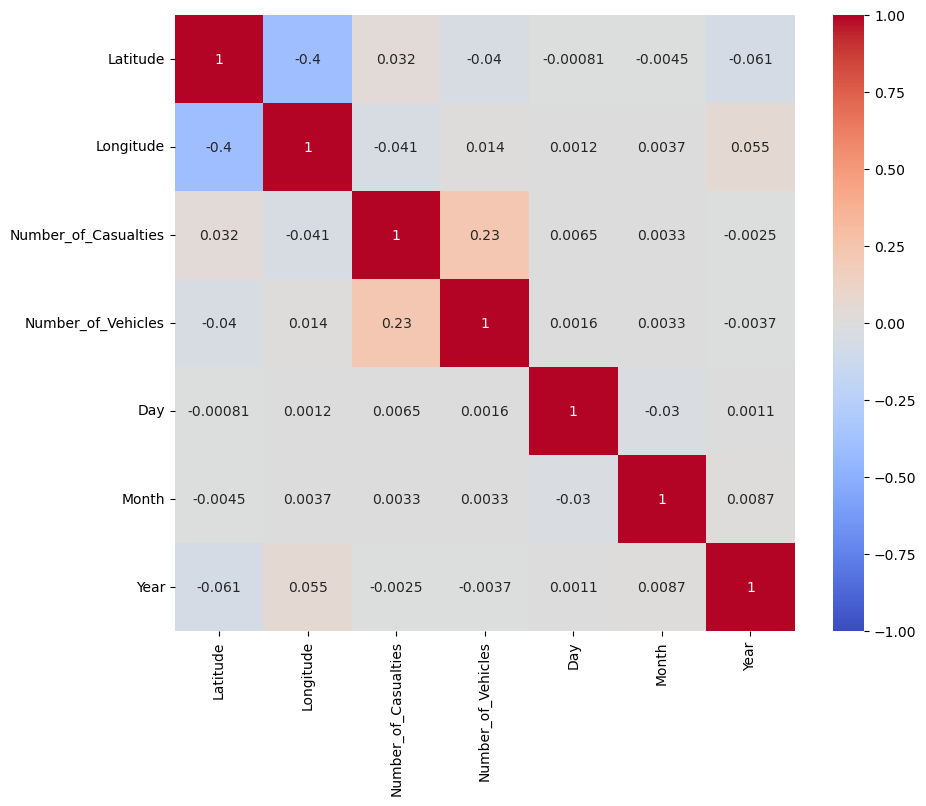

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(accident_copy.select_dtypes(include=['float64', 'int64']).corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'coolwarm')
plt.show()

In [21]:
accident_copy['Accident_Severity'].value_counts()

Accident_Severity
Slight     543634
Serious     85918
Fatal        8470
Name: count, dtype: int64

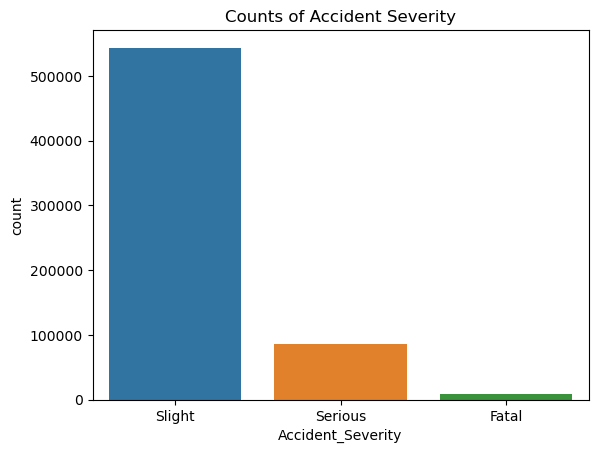

In [22]:
# our data has a lot more Slight casualties
# dont use accuracy, inbalanced datasets, find metrics (macro f1, prec/recall, class analysis, sub sampling? RF/DT/XGB)
sns.countplot(data = accident_copy, x = 'Accident_Severity', order=['Slight', 'Serious', 'Fatal'])
plt.title('Counts of Accident Severity')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


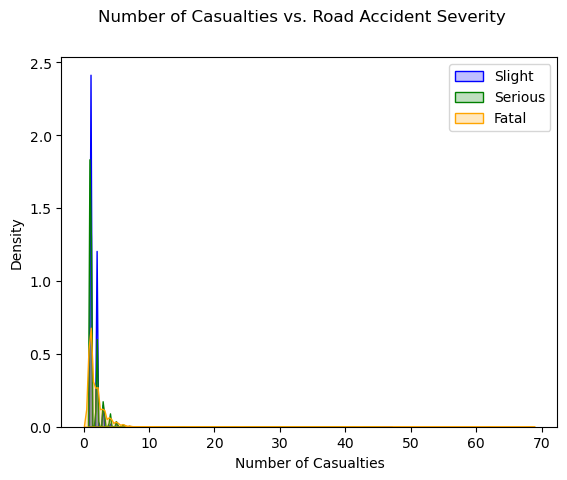

In [23]:
fig, ax = plt.subplots()

sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Slight"]["Number_of_Casualties"], fill=True, color="blue", label="Slight", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Serious"]["Number_of_Casualties"], fill=True, color="green", label="Serious", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Fatal"]["Number_of_Casualties"], fill=True, color="orange", label="Fatal", ax=ax)

ax.set_xlabel("Number of Casualties")
ax.set_ylabel("Density")

fig.suptitle("Number of Casualties vs. Road Accident Severity")

ax.legend()
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


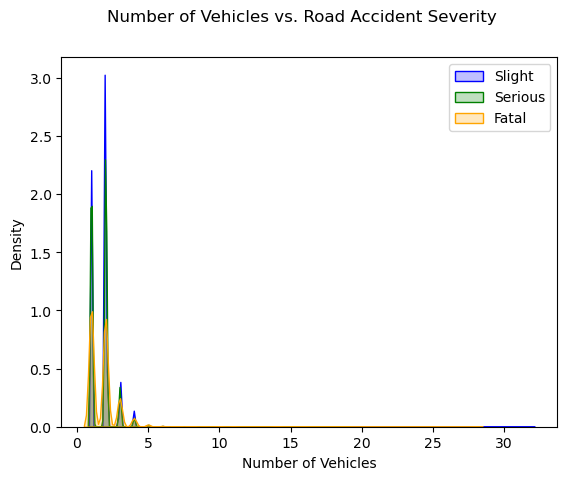

In [24]:
fig, ax = plt.subplots()

sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Slight"]["Number_of_Vehicles"], fill=True, color="blue", label="Slight", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Serious"]["Number_of_Vehicles"], fill=True, color="green", label="Serious", ax=ax)
sns.kdeplot(accident_copy[accident_copy["Accident_Severity"]=="Fatal"]["Number_of_Vehicles"], fill=True, color="orange", label="Fatal", ax=ax)

ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Density")

fig.suptitle("Number of Vehicles vs. Road Accident Severity")

ax.legend()
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


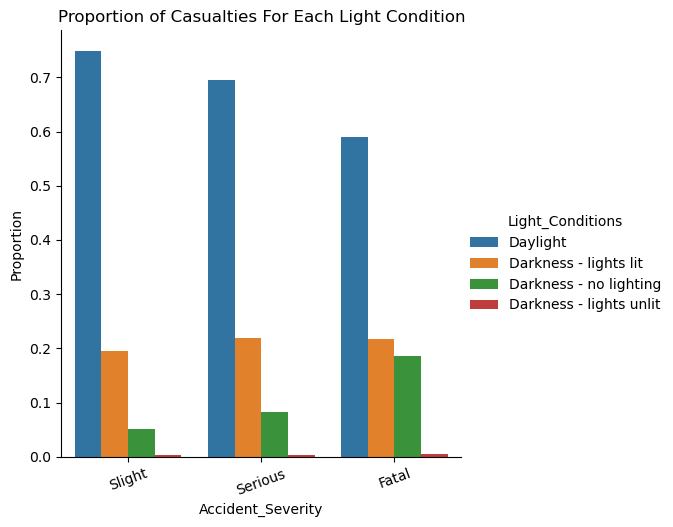

In [25]:
x,y = 'Accident_Severity', 'Light_Conditions'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.xticks(rotation=20)
plt.title('Proportion of Casualties For Each Light Condition')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


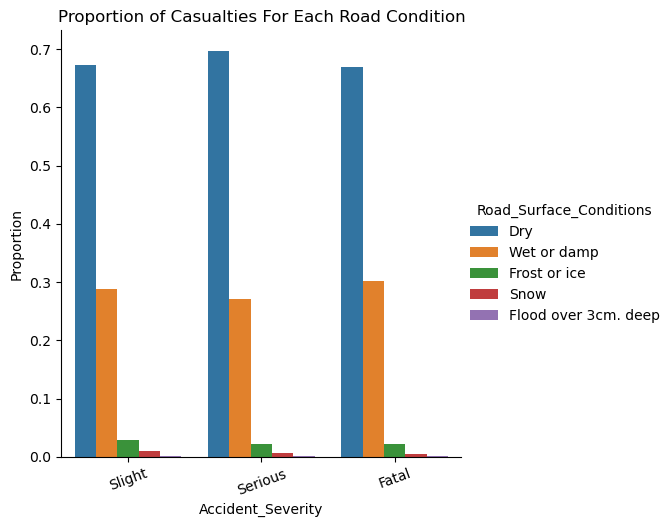

In [26]:
x,y = 'Accident_Severity', 'Road_Surface_Conditions'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.xticks(rotation=20)
plt.title('Proportion of Casualties For Each Road Condition')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


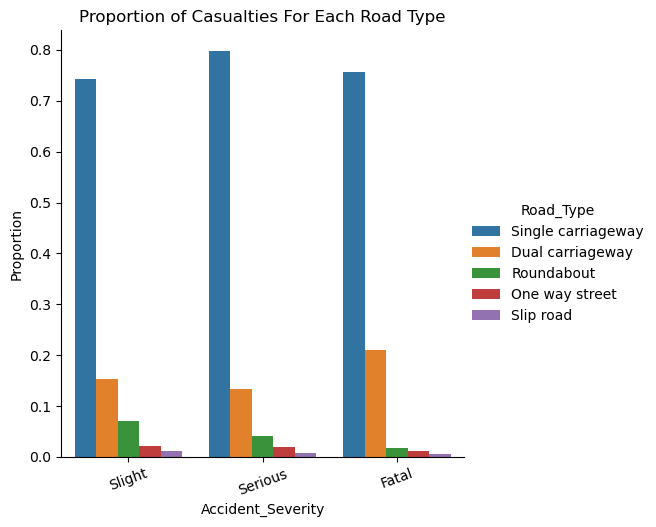

In [27]:
# exclude one way street/ roundabouts for analysis?
x,y = 'Accident_Severity', 'Road_Type'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.xticks(rotation=20)
plt.title('Proportion of Casualties For Each Road Type')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


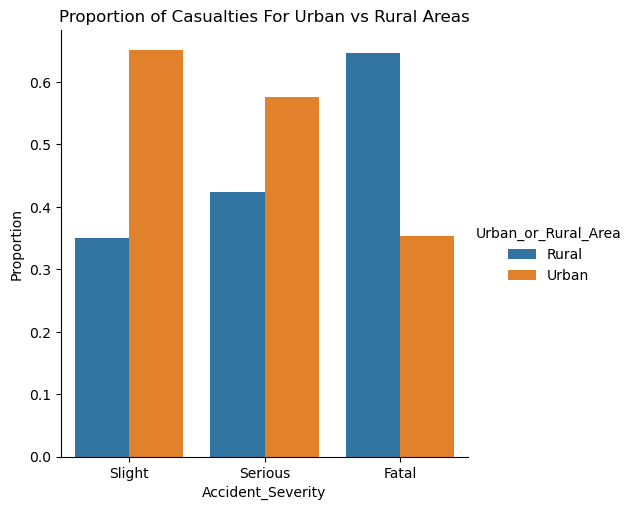

In [28]:
x,y = 'Accident_Severity', 'Urban_or_Rural_Area'

(accident_copy
.groupby(x)[y]
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue=y,kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Proportion of Casualties For Urban vs Rural Areas')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


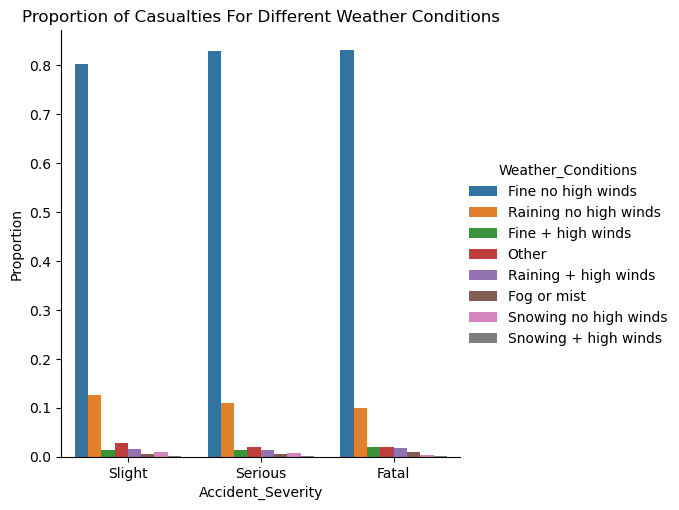

In [29]:
(accident_copy
.groupby('Accident_Severity')['Weather_Conditions']
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue='Weather_Conditions',kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Proportion of Casualties For Different Weather Conditions')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


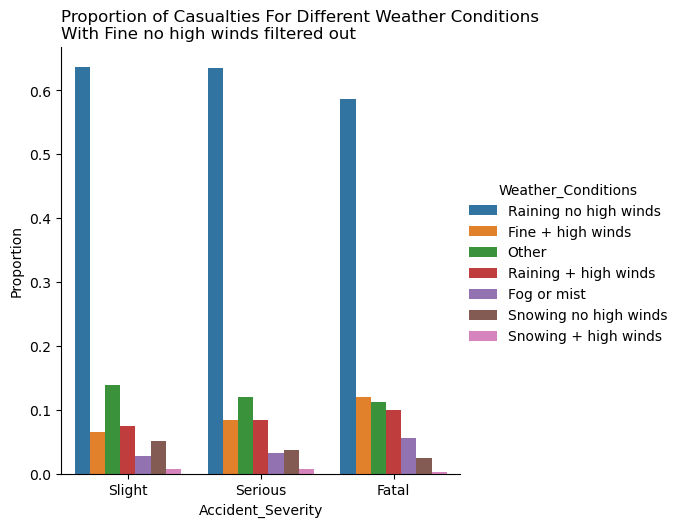

In [30]:
(accident_copy[accident_copy['Weather_Conditions']!='Fine no high winds']
.groupby('Accident_Severity')['Weather_Conditions']
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue='Weather_Conditions',kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Proportion of Casualties For Different Weather Conditions\n\
With Fine no high winds filtered out', loc='left')
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


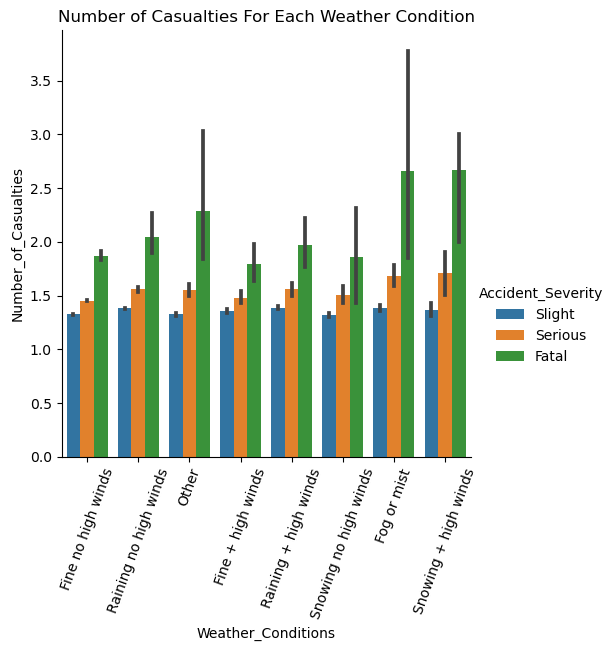

In [31]:
sns.catplot(data=accident_copy, x="Weather_Conditions", y="Number_of_Casualties", 
            hue='Accident_Severity', hue_order=['Slight', 'Serious', 'Fatal'], kind="bar")
plt.xticks(rotation=70)
plt.title('Number of Casualties For Each Weather Condition')
plt.show()

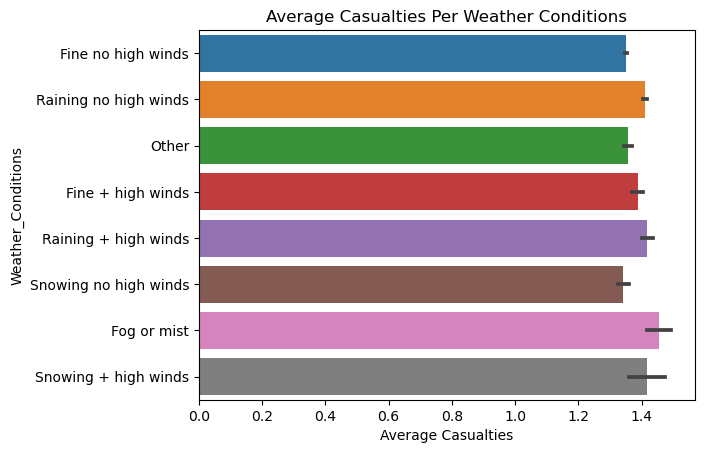

In [32]:
sns.barplot(data=accident_copy, x="Number_of_Casualties", y="Weather_Conditions",
            estimator='mean')
plt.xlabel('Average Casualties')
plt.title('Average Casualties Per Weather Conditions')
plt.show()

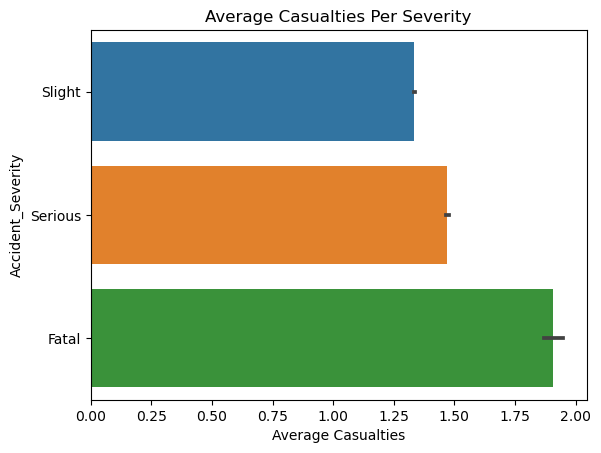

In [33]:
sns.barplot(data=accident_copy, x="Number_of_Casualties", y="Accident_Severity",
            estimator='mean', order=['Slight', 'Serious', 'Fatal'])
plt.xlabel('Average Casualties')
plt.title('Average Casualties Per Severity')
plt.show()

In [34]:
(accident_copy['Year']
.value_counts())

Year
2019    175476
2020    164250
2021    158102
2022    140194
Name: count, dtype: int64

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


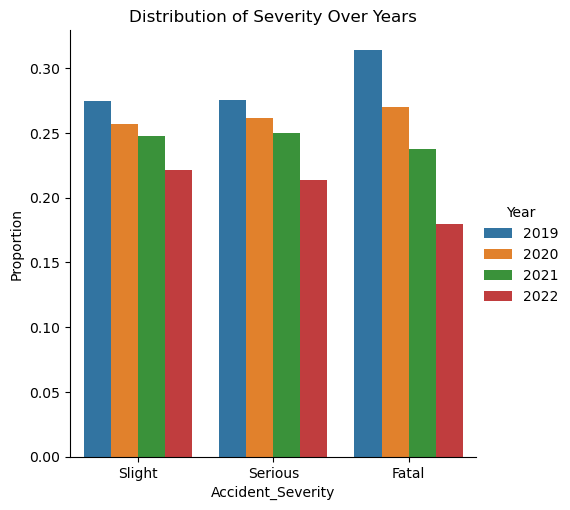

In [35]:
#accident counts over time for each severity
(accident_copy
.groupby('Accident_Severity')['Year']
.value_counts(normalize=True)
.rename('Proportion')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Proportion',
      hue='Year',kind='bar', order=['Slight', 'Serious', 'Fatal']))

plt.title('Distribution of Severity Over Years')
plt.show()

In [36]:
sns.lineplot(data=accident_copy, x='Month', y='Number_of_Casualties',
              hue='Accident_Severity', palette=['green', 'blue', 'red'],
              hue_order=['Slight', 'Serious', 'Fatal'])
plt.xlabel('Months')
plt.ylabel('Number of Casualties')
plt.title('Distribution of Casualty vs Severity Over Months')
plt.xticks(np.arange(1, 13))
plt.show()

/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jennifer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


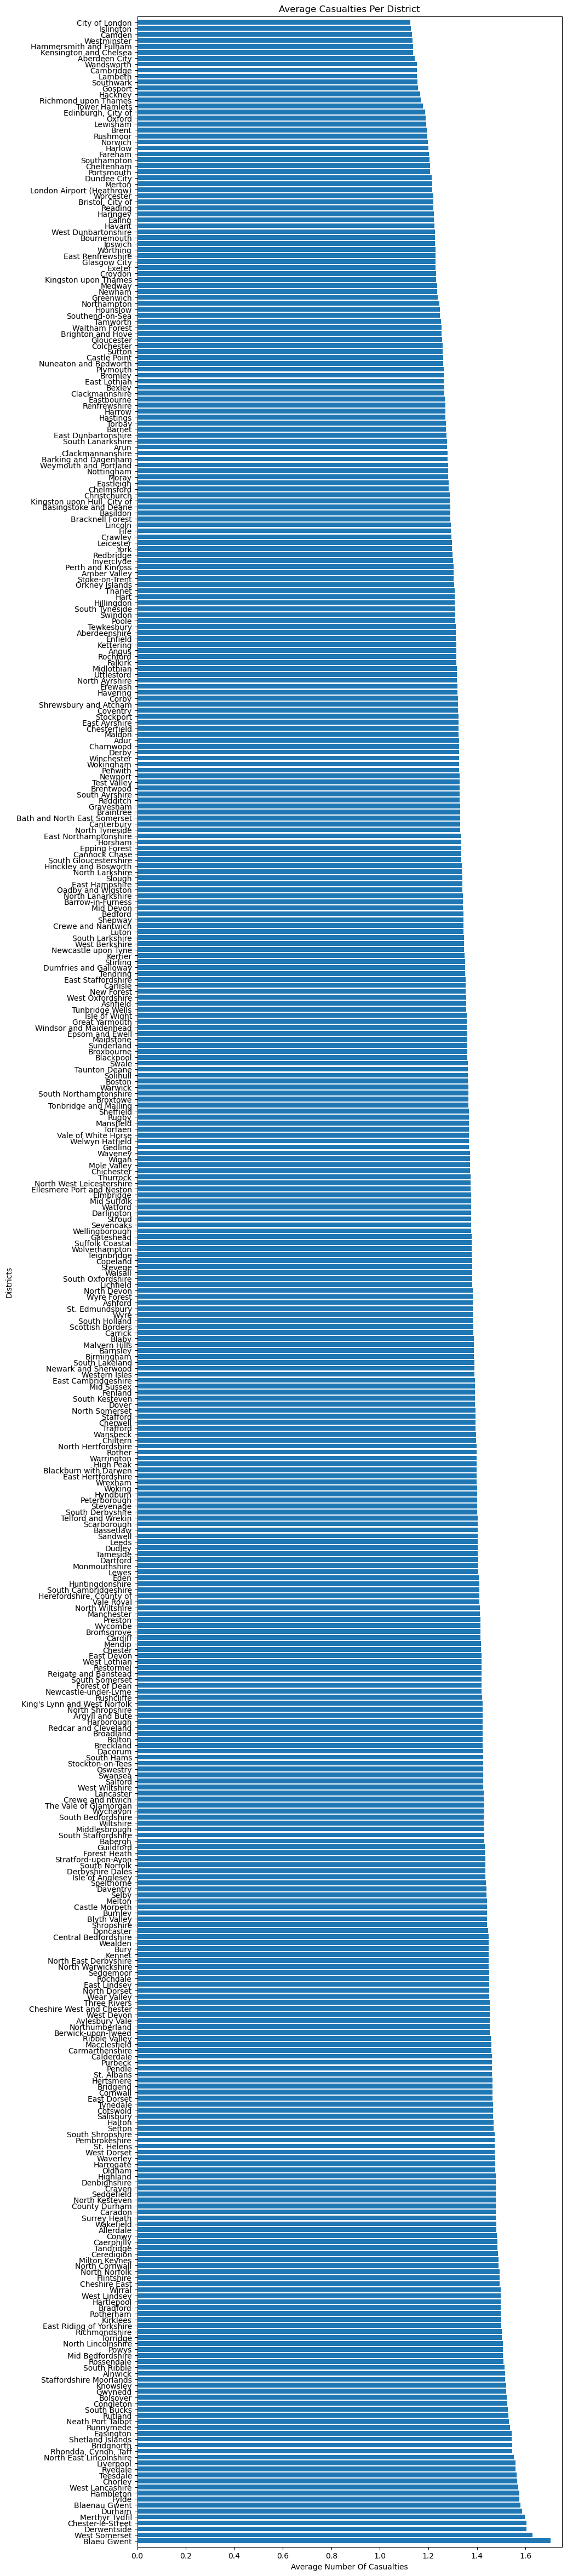

In [ ]:
grouped_area = accident_copy.groupby('District_Area')['Number_of_Casualties'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,60))
plt.barh(y=grouped_area.index, width=grouped_area.values)
plt.xlim([0,1.75])
plt.ylim([-1,422])
plt.xlabel('Average Number Of Casualties')
plt.ylabel('Districts')
plt.title('Average Casualties Per District')
plt.show()

## Encoding

Because we might try out CatBoost, don't drop the OHE columns yet. CatBoost helps with categorical data I think.

In [ ]:
# Use One Hot Encoder on all categorical columns except Weather_Conditions
from sklearn.preprocessing import OneHotEncoder
# categorical columns include Light_Conditions, District_Area,
# Road_Surface_Conditions, Road_Type,	Urban_or_Rural_Area,
# Weather_Conditions, Vehicle_Type

categorical = ['Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',	'Urban_or_Rural_Area', 'Vehicle_Type']

for col in categorical:
  ohe = OneHotEncoder()
  categorical_ohe = ohe.fit_transform(accident_copy[[col]]).toarray()
  df = pd.DataFrame(categorical_ohe, columns=list(ohe.categories_[0]))
  accident_copy[ohe.categories_[0]] = categorical_ohe

In [ ]:
# use MultiLabelBinarizer on Weather_Conditions??
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
weather = mlb.fit_transform(accident_copy['Weather_Conditions_List'])
# one for everything that was in the weather condition that day
accident_copy[mlb.classes_] = weather
accident_copy = accident_copy.drop(columns=['Weather_Conditions'])
mlb.classes_

array(['Fine', 'Fog or mist', 'High winds', 'Other', 'Raining', 'Snowing'],
      dtype=object)

## Classifiers to try out for baseline

In [ ]:
accident_copy.columns

Index(['Index', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'District_Area', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Day', 'Month', 'Year',
       'Accident_Date', 'Weather_Conditions_List', 'Darkness - lights lit',
       'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight', 'Dry',
       'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp',
       'Dual carriageway', 'One way street', 'Roundabout',
       'Single carriageway', 'Slip road', 'Rural', 'Urban',
       'Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car',
       'Goods 7.5 tonnes mgw and over', 'Goods over 3.5t. and under 7.5t',
       'Minibus (8 - 16 passenger seats)', 'Motorcycle 125cc and under',
       'Motorcycle 50cc and under', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 500cc', 'Other vehicle', 'Pedal cycle', 'Ridden horse',
    

### Decision Tree (using LabelEncoding for Categorical Columns & Strictly Use of Numerical Columns)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Encode categorical variables
label_encoder = LabelEncoder()
accident_copy['Light_Conditions'] = label_encoder.fit_transform(accident_copy['Light_Conditions'])
accident_copy['Road_Surface_Conditions'] = label_encoder.fit_transform(accident_copy['Road_Surface_Conditions'])
accident_copy['Road_Type'] = label_encoder.fit_transform(accident_copy['Road_Type'])
accident_copy['Urban_or_Rural_Area'] = label_encoder.fit_transform(accident_copy['Urban_or_Rural_Area'])
accident_copy['Weather_Conditions_List'] = accident_copy['Weather_Conditions_List'].apply(lambda x: label_encoder.fit_transform(x))
accident_copy['Vehicle_Type'] = label_encoder.fit_transform(accident_copy['Vehicle_Type'])
accident_copy['Accident_Date'] = pd.to_datetime(accident_copy['Accident_Date'])

# Select only numeric columns for training the model
numeric_columns = ['Number_of_Casualties', 'Number_of_Vehicles', 'Month',
                    'Light_Conditions', 'Year', 'Urban', 'Rural', 'Single carriageway',
                    'Dual carriageway', 'Roundabout', 'Slip road'] 
target = 'Accident_Severity'

# Select features and target variable 
X = accident_copy[numeric_columns]
y = accident_copy[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

ValueError: could not convert string to float: 'Darkness - lights lit'

In [ ]:
# Display evaluation metrics
print(f"\nAccuracy: {accuracy:.2f}")
print(f"\nF1-score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.85

F1-score: 0.32

Confusion Matrix:
[[    15     82   1568]
 [    79    349  16595]
 [   155    921 107841]]

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.06      0.01      0.02      1665
     Serious       0.26      0.02      0.04     17023
      Slight       0.86      0.99      0.92    108917

    accuracy                           0.85    127605
   macro avg       0.39      0.34      0.32    127605
weighted avg       0.77      0.85      0.79    127605



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', DecisionTreeClassifier(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=42)
    
param_grid = {'classifier__max_depth':[4,6,8,10,12,14,16,18,20]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation macro F-1 score: {cv_score}\nTest macro F-1 score: {test_score}')

Cross-validation macro F-1 score: 0.33336891152698145
Test macro F-1 score: 0.32804554760612176


In [ ]:
grid_search.best_params_

{'classifier__max_depth': 10}

In [ ]:
# Display evaluation metrics
pipe = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                        ['classifier', DecisionTreeClassifier(max_depth=10, random_state=42)]])
pipe.fit(X_train, y_train)
y_pred_os = pipe.predict(X_test)
classification_rep_dt_os = classification_report(y_test, y_pred_os)
f1_dt_os = f1_score(y_test, y_pred_os, average='macro')
print(f"\nF1-score: {f1_dt_os:.2f}")
print("\nClassification Report:")
print(classification_rep_dt_os)


F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.03      0.57      0.06      1665
     Serious       0.17      0.32      0.22     17023
      Slight       0.90      0.56      0.69    108917

    accuracy                           0.53    127605
   macro avg       0.37      0.49      0.33    127605
weighted avg       0.80      0.53      0.62    127605



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics for the random forest model
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print(f"\nF1-score: {f1_rf:.2f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.85

F1-score: 0.32

Random Forest Confusion Matrix:
[[     5     53   1607]
 [    37    244  16742]
 [    65    543 108309]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       Fatal       0.05      0.00      0.01      1665
     Serious       0.29      0.01      0.03     17023
      Slight       0.86      0.99      0.92    108917

    accuracy                           0.85    127605
   macro avg       0.40      0.34      0.32    127605
weighted avg       0.77      0.85      0.79    127605



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipeline_rf = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', RandomForestClassifier(random_state=42)]])

stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=42)
    
param_grid = {'classifier__max_depth':[4,6,8,10,12,14,16,18,20]}
grid_search_rf = GridSearchCV(estimator=pipeline_rf,
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
cv_score_rf = grid_search_rf.best_score_
test_score_rf = grid_search_rf.score(X_test, y_test)
print(f'Cross-validation macro F-1 score: {cv_score_rf}\
      \nTest macro F-1 score: {test_score_rf}')

KeyboardInterrupt: 

In [ ]:
grid_search_rf.best_params_

{'classifier__max_depth': 14}

In [ ]:
# Display evaluation metrics
pipe_rf = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                        ['classifier', RandomForestClassifier(max_depth=14, random_state=42)]])
pipe_rf.fit(X_train, y_train)
y_pred__rfos = pipe_rf.predict(X_test)
classification_rep_rf_os = classification_report(y_test, y_pred__rfos)
f1_rf_os = f1_score(y_test, y_pred__rfos, average='macro')
print(f"\nF1-score: {f1_rf_os:.2f}")
print("\nClassification Report:")
print(classification_rep_rf_os)


F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.03      0.53      0.06      1665
     Serious       0.18      0.33      0.23     17023
      Slight       0.90      0.57      0.70    108917

    accuracy                           0.54    127605
   macro avg       0.37      0.48      0.33    127605
weighted avg       0.80      0.54      0.63    127605



### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Select features and target variable 
X2 = accident_copy[numeric_columns]
y2 = accident_copy[target].replace({'Slight': 0, 'Serious': 1, 'Fatal':2})

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifier to the training data
xgb_classifier.fit(X2_train, y2_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X2_test)

# Evaluate the random forest model
accuracy_xgb = accuracy_score(y2_test, y_pred_xgb)
f1_xgb = f1_score(y2_test, y_pred_xgb, average='macro')
conf_matrix_xgb = confusion_matrix(y2_test, y_pred_xgb)
classification_rep_xgb = classification_report(y2_test, y_pred_xgb)

# Display evaluation metrics for the random forest model
print(f"\nXGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"\nF1-score: {f1_xgb:.2f}")
print("\nnXGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("\nXGBoost Classification Report:")
print(classification_rep_xgb)


XGBoost Accuracy: 0.85

F1-score: 0.31

nXGBoost Confusion Matrix:
[[108859     56      2]
 [ 16970     51      2]
 [  1647     18      0]]

nXGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    108917
           1       0.41      0.00      0.01     17023
           2       0.00      0.00      0.00      1665

    accuracy                           0.85    127605
   macro avg       0.42      0.33      0.31    127605
weighted avg       0.78      0.85      0.79    127605



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipeline_xgb = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['classifier', XGBClassifier(random_state=42)]])

stratified_kfold_xgb = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=42)
    
param_grid_xgb = {'classifier__n_estimators':[1,2,3,4,5],
              'classifier__max_depth':[8,10,12,14,16]}
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb,
                           param_grid=param_grid_xgb,
                           scoring='f1_macro',
                           cv=stratified_kfold_xgb,
                           n_jobs=-1)

grid_search_xgb.fit(X2_train, y2_train)
cv_score_xgb = grid_search_xgb.best_score_
test_score_xgb = grid_search_xgb.score(X2_test, y2_test)
print(f'Cross-validation macro F-1 score: {cv_score_xgb}\
      \nTest macro F-1 score: {test_score_xgb}')

Cross-validation macro F-1 score: 0.3350759510671053      
Test macro F-1 score: 0.33355926657934165


In [ ]:
grid_search_xgb.best_params_

{'classifier__max_depth': 8, 'classifier__n_estimators': 5}

In [ ]:
# Display evaluation metrics
pipe_xgb = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                        ['classifier', XGBClassifier(n_estimators=5, max_depth=8, random_state=42)]])
pipe_xgb.fit(X2_train, y2_train)
y_pred_xgb_os = pipe_xgb.predict(X2_test)
classification_rep_xgb_os = classification_report(y2_test, y_pred_xgb_os)
f1_xgb_os = f1_score(y2_test, y_pred_xgb_os, average='macro')
print(f"\nF1-score: {f1_xgb_os:.2f}")
print("\nClassification Report:")
print(classification_rep_xgb_os)


F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70    108917
           1       0.18      0.35      0.24     17023
           2       0.03      0.56      0.06      1665

    accuracy                           0.54    127605
   macro avg       0.37      0.49      0.33    127605
weighted avg       0.80      0.54      0.63    127605



## Fairness Analysis (WIP)